# <center> <font color='blue'> Introducción a Matplotlib Animation </font> </center>

#### <center>  Sitio Web Oficial: [https://matplotlib.org/stable/api/animation_api.html) </center>


`Matplotlib.animation` es un submódulo de la biblioteca matplotlib en Python, utilizado para crear animaciones a partir de gráficos y visualizaciones. 

- Este submódulo permite actualizar gráficos en una secuencia temporal, creando así una animación.
- Es muy útil para visualizar datos que cambian con el tiempo o para explicar conceptos dinámicos.

Breve descripción de las principales clases y funciones dentro de `matplotlib.animation`:

- FuncAnimation: Es la clase más comúnmente utilizada para crear animaciones en matplotlib. Permite actualizar un gráfico con una función que se llama repetidamente, actualizando el contenido de la figura.

- ArtistAnimation: Otra clase que se utiliza para crear animaciones, aunque menos flexible que FuncAnimation. Esta clase toma una lista de artistas (elementos gráficos) y los muestra en secuencia.

## Ejemplo: Animación función senoidal
---

### Importar las bibliotecas necesarias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

### Definir parámetros y funciones

In [2]:
# Crear datos iniciales
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

### Crear la figura y los ejes

In [ ]:
# Crear la figura y el objeto de ejes
fig, ax = plt.subplots()
line, = ax.plot(x, y)
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Amplitud')

### Definir la función de inicialización
Definimos la función `init()` que establece los datos iniciales de la línea. Esto asegura que la animación comience desde un estado conocido.

In [4]:
# Función de inicialización
def init():
    line.set_ydata(np.sin(x))  # Establecer los datos iniciales de y
    return line,

### Definir la función de actualización
- Definimos la función de actualización `update(frame)` que actualiza los datos de la línea en cada fotograma. 
- El parámetro `frame` cambia en cada llamada para animar la función seno.
- La adición de ``frame / 10.0`` a la variable angular theta introduce un cambio en la fase en cada fotograma, lo que crea una 
    animación continua

In [5]:
# Función de actualización
def update(frame):
    line.set_ydata(np.sin(x + frame / 10.0))  # Actualizar los datos de y
    return line,

### Crear la animación
Utilizamos `FuncAnimation` para crear la animación. `FuncAnimation` crea la animación llamando a update en cada fotograma y usando init 
para la inicialización.
- `blit=True` se utiliza para optimizar la animación.

In [13]:
# Crear la animación
ani = FuncAnimation(fig, update, frames=range(100), init_func=init, interval=50, blit=True)
# Se generarán 100 fotogramas para la animación.

### Guardar la animación como un archivo GIF
Guardamos la animación en un archivo GIF usando PillowWriter. El parámetro `writer=PillowWriter(fps=20)` en el método `ani.save()` de Matplotlib especifica el escritor que se utilizará para guardar la animación y la velocidad de 
fotogramas (fps, frames per second) del archivo resultante

In [7]:
# Guardar la animación como un archivo GIF
ani.save('sine_wave_animation.gif', writer=PillowWriter(fps=20))

### Mostrar la animación como HTML
Mostramos la animación en el cuaderno de Jupyter usando IPython.display.HTML:

In [14]:
# Mostrar la animación en Jupyter Notebook
HTML(ani.to_jshtml())

## <font color='blue'> Ejemplo 2: </font> Función espiral logarítmica
---

La ecuación paramétrica de una espiral logarítmica es:
$$\large r = a e^{b\theta} $$
donde $\large a$ y $\large b$ son constantes.

### 1. Importar las bibliotecas necesarias

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

### 2. Definir parámetros y funciones

In [17]:
# Crear datos iniciales
theta = np.linspace(0, 4*np.pi, 1000)
r = 0.1 * np.exp(0.1 * theta)

### 3. Crear la figura y personalizar los ejes
- `line, = ax.plot([], [], lw=2)` crea una línea sin datos iniciales con un grosor de línea de 2 unidades. Esta línea se actualizará durante la animación.

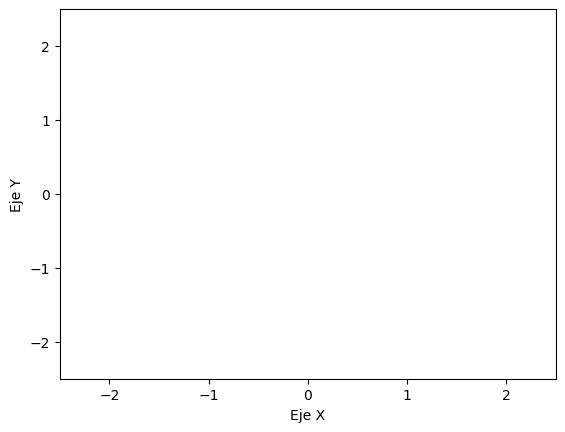

In [19]:
# Crear la figura y los ejes
fig, ax = plt.subplots()
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
# Personalizar las etiquetas de los ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
line, = ax.plot([], [], lw=2)

### 4. Definir la función de inicialización
- `line.set_data([], [])`: Inicializa la línea sin datos (x e y vacíos). Esto asegura que la línea no se muestre hasta que la animación comience.

In [ ]:
# Función de inicialización
def init():
    line.set_data([], [])
    return line,

### 5. Definir la función de actualización
- Calcula los nuevos valores de x e y para la espiral logarítmica en función del frame.
- `line.set_data(x, y)`: Actualiza los datos de la línea con los nuevos valores calculados.

In [ ]:
# Función de actualización
def update(frame):
    x = r * np.cos(theta + frame / 10.0)
    y = r * np.sin(theta + frame / 10.0)
    line.set_data(x, y)
    return line,

### 6. Crear la Animación: 
Utilizamos `FuncAnimation` para crear la animación. `FuncAnimation crea la animación llamando a update en cada fotograma y usando init 
para la inicialización.

In [ ]:
# Crear la animación
ani = FuncAnimation(fig, update, frames=range(100), init_func=init, blit=True)

### 7. Guardar la animación como un archivo GIF

In [ ]:
# Guardar la animación como un archivo GIF
ani.save('spiral_animation.gif', writer=PillowWriter(fps=20))

### 8. Mostrar la animación como HTML

In [25]:
# Mostrar la animación en Jupyter Notebook
HTML(ani.to_jshtml())

In [ ]:
### Ejemplo: Tomado de el sitio oficial

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

In [18]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani_1 = animation.FuncAnimation(fig=fig, func=update, frames=50, interval=30)

# Guardar la animación como un archivo GIF
ani_1.save('animation_1.gif', writer=PillowWriter(fps=20))

# Mostrar la animación en Jupyter Notebook
HTML(ani_1.to_jshtml())


<IPython.core.display.Javascript object>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import ipywidgets as widgets
from ipywidgets import interact

# Asegúrate de que las animaciones se rendericen correctamente en Jupyter Notebook
%matplotlib notebook

# Datos iniciales
x = np.linspace(0, 2 * np.pi, 100)
fig, ax = plt.subplots()
line, = ax.plot(x, np.sin(x))

# Función de actualización
def update(num, x, line, freq):
    line.set_ydata(np.sin(x + num / 10.0) * np.sin(freq * x))  # Actualiza los datos de y
    return line,

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=100, fargs=(x, line, 1), interval=100, blit=True)

# Crear un widget para controlar la frecuencia
freq_slider = widgets.FloatSlider(value=1, min=0.1, max=10.0, step=0.1, description='Frecuencia:')

def update_slider(freq):
    ani.event_source.stop()
    ani = animation.FuncAnimation(fig, update, frames=100, fargs=(x, line, freq), interval=100, blit=True)
    ani.event_source.start()
    return ani

interact(update_slider, freq=freq_slider)


<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=1.0, description='Frecuencia:', max=10.0, min=0.1), Output()), _dom_cl…

<function __main__.update_slider(freq)>